In [1]:
import vgg16
from vgg16 import VGG16
import tensorflow as tf
import numpy as np
import PIL
from PIL import Image
import os

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# trained vgg16 model setup
if os.path.exists('vgg16'):
    vgg16.data_dir = 'vgg16/'
else:
    vgg16.maybe_download()

In [3]:
content_layers = [4]
style_layers = list(range(13))
model = VGG16()

In [4]:
def load_image(filename):
    img = Image.open(filename)
    return np.divide(np.array(img, dtype=np.float32), 256)


content = load_image("content.jpg")
style = load_image("style.jpg")

In [5]:
def plot_image_bigplot_im (image):
    # Ensure the pixel-values are between 0 and 255.
    image = np.clip(image, 0.0, 255.0)

    # Convert pixels to bytes.
    image = image.astype(np.uint8)

    # Convert to a PIL-image and display it.
    display(PIL.Image.fromarray(image))


# constant is pre-calculated or not
def content_tensors(model, sess=None, constant=True, content=None):
    # Gets tensor refs from model
    tensors = model.get_layer_tensors(content_layers)
    if constant:
#         sess = tf.Session(graph=model.graph)
        content_activations = sess.run(tensors, feed_dict=model.create_feed_dict(content))
        return np.array(content_activations)
    return tensors
    
    
def style_tensors(model, sess=None, constant=True, style=None):
    tensors = model.get_layer_tensors(style_layers)
#     if constant:
#         sess = tf.Session(graph=model.graph)
    for i in range(len(tensors)):
        tensors[i] = gram_mat(tensors[i])
        if constant:
            tensors[i] = sess.run(tensors[i], feed_dict=model.create_feed_dict(style))
    if constant:
        return np.array(tensors)
    return tensors


def style_transfer(content, style, model, sess, step_size, content_weight=0.1, style_weight=0.8, denoise_weight=0.1):
    # pre-calculated activations
    content_activations = content_tensors(model, sess, content=content)
    style_activations = style_tensors(model, sess, style=style)
    
    # create graph to put image in to be trained on
    with model.graph.as_default():
        transfer_content_activations = content_tensors(model, constant=False)
        transfer_style_activations = style_tensors(model, constant=False)
        content_loss = tf.losses.mean_squared_error(content_activations, transfer_content_activations)
        style_loss = tf.reduce_mean(
            [tf.losses.mean_squared_error(style_activations[i], transfer_style_activations[i]) 
             for i in range(len(style_activations))]
        )
        denoise_loss = tf.reduce_mean(tf.abs(model.input[:,1:,:,:] - model.input[:,:-1,:,:])) + tf.reduce_mean(tf.abs(model.input[:,:,1:,:] - model.input[:,:,:-1,:]))

        content_scale = tf.Variable(1/content_loss)
        style_scale = tf.Variable(1/style_loss)
        denoise_scale = tf.Variable(1/denoise_loss, validate_shape=False)
        
        gradient = tf.gradients(
            content_weight * tf.reduce_mean(content_loss) * content_scale +
            style_weight * tf.reduce_mean(style_loss) * style_scale +
            denoise_weight * denoise_loss * denoise_scale,
            model.input)
    return gradient, [content_scale.initializer, style_scale.initializer, denoise_scale.initializer]

def gram_mat(matrix):
    matrix = tf.reshape(matrix, [-1, matrix.get_shape()[3]])
    return tf.matmul(tf.transpose(matrix), matrix)

In [6]:
sess = tf.Session(graph=model.graph)
gradient, scale_initializers = style_transfer(content, style, model, sess, 0.01)

In [ ]:
image = np.random.random(content.shape) * 0.1 + 0.5

Iteration: #0


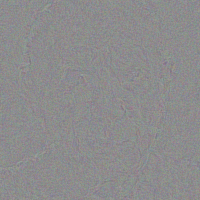

Iteration: #1
Iteration: #2
Iteration: #3
Iteration: #4
Iteration: #5
Iteration: #6
Iteration: #7
Iteration: #8
Iteration: #9
Iteration: #10
Iteration: #11
Iteration: #12
Iteration: #13
Iteration: #14
Iteration: #15
Iteration: #16
Iteration: #17
Iteration: #18
Iteration: #19
Iteration: #20


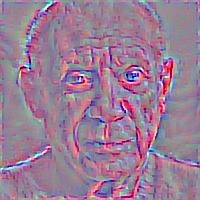

Iteration: #21
Iteration: #22
Iteration: #23
Iteration: #24
Iteration: #25
Iteration: #26
Iteration: #27
Iteration: #28
Iteration: #29
Iteration: #30
Iteration: #31
Iteration: #32
Iteration: #33
Iteration: #34
Iteration: #35
Iteration: #36
Iteration: #37
Iteration: #38
Iteration: #39
Iteration: #40


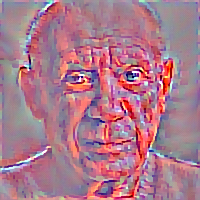

Iteration: #41
Iteration: #42
Iteration: #43
Iteration: #44
Iteration: #45
Iteration: #46
Iteration: #47
Iteration: #48
Iteration: #49
Iteration: #50
Iteration: #51
Iteration: #52
Iteration: #53
Iteration: #54
Iteration: #55
Iteration: #56
Iteration: #57
Iteration: #58
Iteration: #59
Iteration: #60


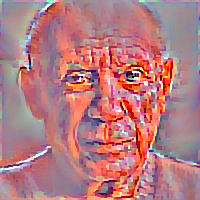

Iteration: #61
Iteration: #62
Iteration: #63
Iteration: #64
Iteration: #65
Iteration: #66
Iteration: #67
Iteration: #68
Iteration: #69
Iteration: #70
Iteration: #71
Iteration: #72
Iteration: #73
Iteration: #74
Iteration: #75
Iteration: #76
Iteration: #77
Iteration: #78
Iteration: #79
Iteration: #80


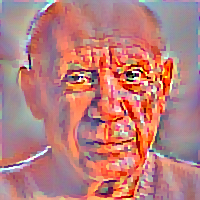

Iteration: #81
Iteration: #82
Iteration: #83
Iteration: #84
Iteration: #85
Iteration: #86
Iteration: #87
Iteration: #88
Iteration: #89
Iteration: #90
Iteration: #91
Iteration: #92
Iteration: #93
Iteration: #94
Iteration: #95
Iteration: #96
Iteration: #97
Iteration: #98
Iteration: #99
Iteration: #100


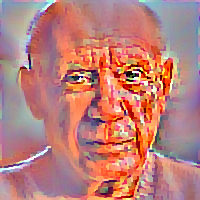

Iteration: #101
Iteration: #102
Iteration: #103
Iteration: #104
Iteration: #105
Iteration: #106
Iteration: #107
Iteration: #108
Iteration: #109
Iteration: #110
Iteration: #111
Iteration: #112
Iteration: #113
Iteration: #114
Iteration: #115
Iteration: #116
Iteration: #117
Iteration: #118
Iteration: #119
Iteration: #120


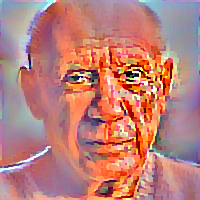

Iteration: #121
Iteration: #122
Iteration: #123
Iteration: #124
Iteration: #125
Iteration: #126
Iteration: #127
Iteration: #128
Iteration: #129
Iteration: #130
Iteration: #131
Iteration: #132
Iteration: #133
Iteration: #134
Iteration: #135
Iteration: #136
Iteration: #137
Iteration: #138
Iteration: #139
Iteration: #140


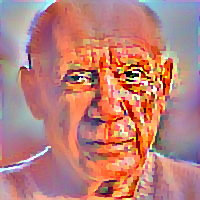

Iteration: #141
Iteration: #142
Iteration: #143
Iteration: #144
Iteration: #145
Iteration: #146
Iteration: #147
Iteration: #148
Iteration: #149
Iteration: #150
Iteration: #151
Iteration: #152
Iteration: #153
Iteration: #154
Iteration: #155
Iteration: #156
Iteration: #157
Iteration: #158
Iteration: #159
Iteration: #160


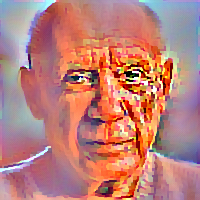

Iteration: #161
Iteration: #162
Iteration: #163
Iteration: #164
Iteration: #165
Iteration: #166
Iteration: #167
Iteration: #168
Iteration: #169
Iteration: #170
Iteration: #171
Iteration: #172
Iteration: #173
Iteration: #174
Iteration: #175
Iteration: #176
Iteration: #177
Iteration: #178
Iteration: #179
Iteration: #180


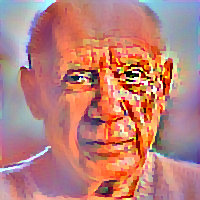

Iteration: #181
Iteration: #182
Iteration: #183
Iteration: #184
Iteration: #185
Iteration: #186
Iteration: #187
Iteration: #188
Iteration: #189
Iteration: #190
Iteration: #191
Iteration: #192
Iteration: #193
Iteration: #194
Iteration: #195
Iteration: #196
Iteration: #197
Iteration: #198
Iteration: #199
Iteration: #200


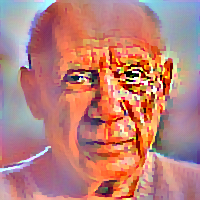

Iteration: #201
Iteration: #202
Iteration: #203
Iteration: #204
Iteration: #205
Iteration: #206
Iteration: #207
Iteration: #208
Iteration: #209
Iteration: #210
Iteration: #211
Iteration: #212
Iteration: #213
Iteration: #214
Iteration: #215
Iteration: #216
Iteration: #217
Iteration: #218
Iteration: #219
Iteration: #220


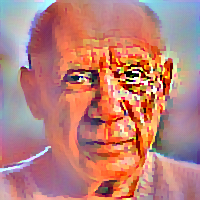

Iteration: #221
Iteration: #222
Iteration: #223
Iteration: #224
Iteration: #225
Iteration: #226
Iteration: #227
Iteration: #228
Iteration: #229
Iteration: #230
Iteration: #231
Iteration: #232
Iteration: #233
Iteration: #234
Iteration: #235
Iteration: #236
Iteration: #237
Iteration: #238
Iteration: #239
Iteration: #240


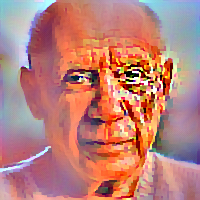

Iteration: #241
Iteration: #242
Iteration: #243
Iteration: #244
Iteration: #245
Iteration: #246
Iteration: #247
Iteration: #248
Iteration: #249
Iteration: #250
Iteration: #251
Iteration: #252
Iteration: #253
Iteration: #254
Iteration: #255
Iteration: #256
Iteration: #257
Iteration: #258
Iteration: #259
Iteration: #260


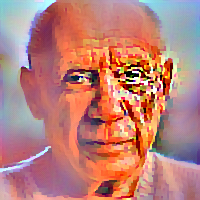

Iteration: #261
Iteration: #262
Iteration: #263
Iteration: #264
Iteration: #265
Iteration: #266
Iteration: #267
Iteration: #268
Iteration: #269
Iteration: #270
Iteration: #271
Iteration: #272
Iteration: #273
Iteration: #274
Iteration: #275
Iteration: #276
Iteration: #277
Iteration: #278
Iteration: #279
Iteration: #280


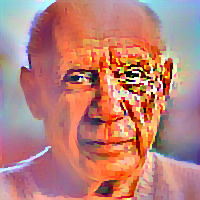

Iteration: #281
Iteration: #282
Iteration: #283
Iteration: #284
Iteration: #285
Iteration: #286
Iteration: #287
Iteration: #288
Iteration: #289
Iteration: #290
Iteration: #291
Iteration: #292
Iteration: #293
Iteration: #294
Iteration: #295
Iteration: #296
Iteration: #297
Iteration: #298
Iteration: #299
Iteration: #300


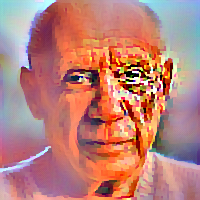

Iteration: #301
Iteration: #302
Iteration: #303
Iteration: #304
Iteration: #305
Iteration: #306
Iteration: #307
Iteration: #308
Iteration: #309
Iteration: #310
Iteration: #311
Iteration: #312
Iteration: #313
Iteration: #314
Iteration: #315
Iteration: #316
Iteration: #317
Iteration: #318
Iteration: #319
Iteration: #320


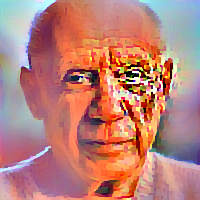

Iteration: #321
Iteration: #322
Iteration: #323
Iteration: #324
Iteration: #325
Iteration: #326
Iteration: #327
Iteration: #328
Iteration: #329
Iteration: #330
Iteration: #331
Iteration: #332
Iteration: #333
Iteration: #334
Iteration: #335
Iteration: #336
Iteration: #337
Iteration: #338
Iteration: #339
Iteration: #340


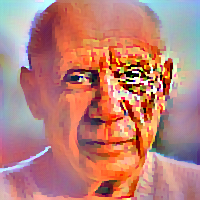

Iteration: #341
Iteration: #342
Iteration: #343
Iteration: #344
Iteration: #345
Iteration: #346
Iteration: #347
Iteration: #348
Iteration: #349
Iteration: #350
Iteration: #351
Iteration: #352
Iteration: #353
Iteration: #354
Iteration: #355
Iteration: #356
Iteration: #357
Iteration: #358
Iteration: #359
Iteration: #360


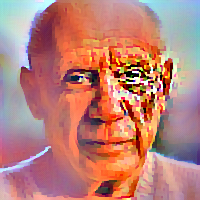

Iteration: #361
Iteration: #362
Iteration: #363
Iteration: #364
Iteration: #365
Iteration: #366
Iteration: #367
Iteration: #368
Iteration: #369
Iteration: #370
Iteration: #371
Iteration: #372
Iteration: #373
Iteration: #374
Iteration: #375
Iteration: #376
Iteration: #377
Iteration: #378
Iteration: #379
Iteration: #380


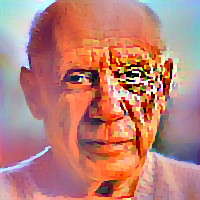

Iteration: #381
Iteration: #382
Iteration: #383
Iteration: #384
Iteration: #385
Iteration: #386
Iteration: #387
Iteration: #388
Iteration: #389
Iteration: #390
Iteration: #391
Iteration: #392
Iteration: #393
Iteration: #394
Iteration: #395
Iteration: #396
Iteration: #397
Iteration: #398
Iteration: #399
Iteration: #400


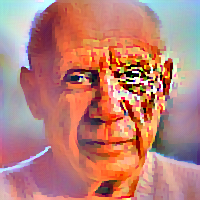

Iteration: #401
Iteration: #402
Iteration: #403
Iteration: #404
Iteration: #405
Iteration: #406
Iteration: #407
Iteration: #408
Iteration: #409
Iteration: #410
Iteration: #411
Iteration: #412
Iteration: #413
Iteration: #414
Iteration: #415
Iteration: #416
Iteration: #417
Iteration: #418
Iteration: #419
Iteration: #420


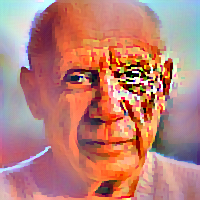

Iteration: #421
Iteration: #422
Iteration: #423
Iteration: #424
Iteration: #425
Iteration: #426
Iteration: #427
Iteration: #428
Iteration: #429
Iteration: #430
Iteration: #431
Iteration: #432
Iteration: #433
Iteration: #434
Iteration: #435
Iteration: #436
Iteration: #437
Iteration: #438
Iteration: #439
Iteration: #440


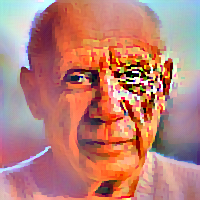

Iteration: #441
Iteration: #442
Iteration: #443
Iteration: #444
Iteration: #445
Iteration: #446
Iteration: #447
Iteration: #448
Iteration: #449
Iteration: #450
Iteration: #451
Iteration: #452
Iteration: #453
Iteration: #454
Iteration: #455
Iteration: #456
Iteration: #457
Iteration: #458
Iteration: #459
Iteration: #460


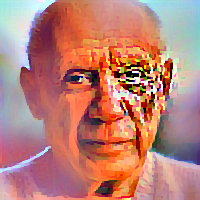

Iteration: #461
Iteration: #462
Iteration: #463
Iteration: #464
Iteration: #465
Iteration: #466
Iteration: #467
Iteration: #468
Iteration: #469
Iteration: #470
Iteration: #471
Iteration: #472
Iteration: #473
Iteration: #474
Iteration: #475
Iteration: #476
Iteration: #477
Iteration: #478
Iteration: #479
Iteration: #480


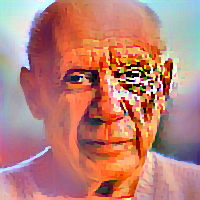

Iteration: #481
Iteration: #482
Iteration: #483
Iteration: #484
Iteration: #485
Iteration: #486
Iteration: #487
Iteration: #488
Iteration: #489
Iteration: #490
Iteration: #491
Iteration: #492
Iteration: #493
Iteration: #494
Iteration: #495
Iteration: #496
Iteration: #497
Iteration: #498
Iteration: #499


In [8]:
step_size = 0.01
feed_dict = model.create_feed_dict(image)
sess.run(scale_initializers, feed_dict)
for i in range(500):
    feed_dict = model.create_feed_dict(image)
    grad = sess.run(gradient, feed_dict=feed_dict)[0][0]
#     print(grad*step_size/np.std(grad))
    image -= grad*step_size/np.std(grad)
    print("Iteration: #" + str(i + 1))
    if (i + 1) % 20 == 0:
        plot_image_bigplot_im(np.multiply(image, 256))